In [113]:
import pandas as pd 
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

In [114]:
df = pd.read_csv('../data/CS Course Enrollment Data.csv')

In [115]:
# assign id to each row
df['id'] = range(1, len(df) + 1)
df

,Semester Admitted,Department,Major,CSCI101_Pass_Sem,CSCI101_Tran_Sem,CSCI128_Pass_Sem,CSCI128_Tran_Sem,CSCI200_Pass_C_Sem,CSCI200_Tran_Sem,CSCI210_Pass_Sem,...,CSCI262_Tran_Sem,CSCI274_Pass_Sem,CSCI306_Pass_Sem,CSCI341_Pass_Sem,CSCI358_Pass_Sem,CSCI370_Pass_Sem,CSCI400_Pass_Sem,CSCI406_Pass_Sem,CSCI442_Pass_Sem,id
0,Spring 2021,Mechanical Engineering,Mechanical Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Spring 2023,Interdisciplinary Program,Space Resources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,Spring 2021,Physics,Physics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,Fall 2017,Metallurgical & Materials Eng,Metallurgical & Materials Eng,Spring 2011,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Fall 2020,Civil & Environmental Enginrng,Engineering - Civil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,Summer Two 2018,Physics,Quantum Engineering,Spring 2019,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7371
7371,Summer Two 2018,Mechanical Engineering,Mechanical Engineering,Spring 2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7372
7372,Summer Two 2018,Petroleum,Petroleum Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7373
7373,Summer Two 2018,Computer Science,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Fall 2018,Fall 2018,Fall 2018,Fall 2018,Fall 2019,NaN,Spring 2019,Fall 2019,7374


In [116]:
# create list of valid semesters 
valid_semesters = [i + " " + j for i in ['Fall', 'Spring', 'Summer One', 'Summer Two'] for j in ['20' + str(year) for year in range(17, 24)]]

df = df[df.iloc[:, 3:-1].apply(lambda x: all(pd.isna(item) or item in valid_semesters for item in x), axis=1)]
df

,Semester Admitted,Department,Major,CSCI101_Pass_Sem,CSCI101_Tran_Sem,CSCI128_Pass_Sem,CSCI128_Tran_Sem,CSCI200_Pass_C_Sem,CSCI200_Tran_Sem,CSCI210_Pass_Sem,...,CSCI262_Tran_Sem,CSCI274_Pass_Sem,CSCI306_Pass_Sem,CSCI341_Pass_Sem,CSCI358_Pass_Sem,CSCI370_Pass_Sem,CSCI400_Pass_Sem,CSCI406_Pass_Sem,CSCI442_Pass_Sem,id
131,Fall 2017,Electrical Engineering,Electrical Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132
132,Fall 2017,Electrical Enginrg & Comp Sci,Electrical Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133
133,Fall 2017,Electrical Enginrg & Comp Sci,Computer Science,Fall 2017,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134
134,Fall 2017,Geophysics,Geophysical Engineering,Fall 2017,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135
135,Fall 2017,Electrical Engineering,EE-Engy & Pwr Electrncs Spclty,NaN,Spring 2017,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Summer Two 2018,Mechanical Engineering,Mechanical Engineering,Fall 2018,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7370
7370,Summer Two 2018,Physics,Quantum Engineering,Spring 2019,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7371
7371,Summer Two 2018,Mechanical Engineering,Mechanical Engineering,Spring 2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7372
7372,Summer Two 2018,Petroleum,Petroleum Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7373


In [117]:
# pivot table from wide to long
melted_df = pd.melt(df, id_vars=['Semester Admitted', 'Department', 'Major', 'id'], var_name='Class_Semester', value_name='Taken')

# filter out NaN rows
melted_df = melted_df.dropna(subset=['Taken', 'Department', 'Major'])

# split 'Class_Semester' into 'Class' and 'Semester'
melted_df[['Class', 'Semester_Type']] = melted_df['Class_Semester'].str.split('_', n=1, expand=True)
melted_df = melted_df.drop(columns=['Class_Semester'])

# split Semester_Type into Pass or Tran
melted_df[['Type', 'Garbage']] = melted_df['Semester_Type'].str.split('_', n=1, expand=True)
melted_df = melted_df.drop(columns=['Garbage', 'Semester_Type'])

# split taken 
melted_df[['Taken_Semester', 'Taken_Year']] = melted_df['Taken'].str.rsplit(' ', n=1, expand=True)

# replace 261 with 200, 262 with 220 
melted_df['Class'] = melted_df['Class'].replace('CSCI261', 'CSCI200')
melted_df['Class'] = melted_df['Class'].replace('CSCI262', 'CSCI220')

# Display the first few rows to verify
melted_df.sort_values(by='id').head(10)

,Semester Admitted,Department,Major,id,Taken,Class,Type,Taken_Semester,Taken_Year
53568,Fall 2017,Electrical Engineering,Electrical Engineering,132,Fall 2017,CSCI200,Pass,Fall,2017
53569,Fall 2017,Electrical Enginrg & Comp Sci,Electrical Engineering,133,Fall 2017,CSCI200,Pass,Fall,2017
2,Fall 2017,Electrical Enginrg & Comp Sci,Computer Science,134,Fall 2017,CSCI101,Pass,Fall,2017
53570,Fall 2017,Electrical Enginrg & Comp Sci,Computer Science,134,Fall 2017,CSCI200,Pass,Fall,2017
53571,Fall 2017,Geophysics,Geophysical Engineering,135,Fall 2017,CSCI200,Pass,Fall,2017
3,Fall 2017,Geophysics,Geophysical Engineering,135,Fall 2017,CSCI101,Pass,Fall,2017
5956,Fall 2017,Electrical Engineering,EE-Engy & Pwr Electrncs Spclty,136,Spring 2017,CSCI101,Tran,Spring,2017
53572,Fall 2017,Electrical Engineering,EE-Engy & Pwr Electrncs Spclty,136,Fall 2017,CSCI200,Pass,Fall,2017
53573,Fall 2017,Electrical Engineering,Electrical Engineering,137,Fall 2017,CSCI200,Pass,Fall,2017
5,Fall 2017,Electrical Engineering,Electrical Engineering,137,Fall 2017,CSCI101,Pass,Fall,2017


# Validation

In [118]:
print("DEPARTMENTS:")
print("\t", melted_df['Department'].unique(), '\n')

print("MAJORS:")
print("\t", melted_df['Major'].unique(), '\n')

print("CLASSES:")
print("\t", melted_df['Class'].unique(), '\n')

print("SEMESTERS:")
print("\t", melted_df['Taken_Year'].unique(), '\n')

DEPARTMENTS:
	 ['Electrical Enginrg & Comp Sci' 'Geophysics' 'Electrical Engineering'
 'Applied Math & Statistics' 'Computer Science' 'Economics and Business'
 'Civil & Environmental Enginrng' 'Mechanical Engineering' 'Physics'
 'Interdisciplinary Program' 'Engineering Design & Society'
 'Metallurgical & Materials Eng' 'Geo & Geological Engineering'
 'Non-Degree Program Undergrad' 'Undecided'
 'Chemical & Biological Engineer' 'Petroleum' 'Chemistry' 'Mining'
 'Non-Degree Program Grad Level' 'Humanities Arts Social Science' 'Honors'
 'Environ Science & Engineering'] 

MAJORS:
	 ['Computer Science' 'Geophysical Engineering' 'Electrical Engineering'
 'EE-Engy & Pwr Electrncs Spclty' 'Statistics'
 'EE-Intg Crcts & Elctrnc Spclty' 'CS-Data Science Spclty'
 'CS-Research Honors Spclty' 'Computational & Applied Math'
 'CS-Robotics Intel Sys Spclty' 'Civil Engineering'
 'Mechanical Engineering' 'Engineering Physics'
 'EE-Antenn & Wirels Comm Spclty' 'CS-Computer Eng Spclty'
 'EE-Info Sys & Scie

In [119]:
# save to .csv
melted_df.to_csv('../data/CS_Course_Enrollment_Data_Pivot.csv', index=False)

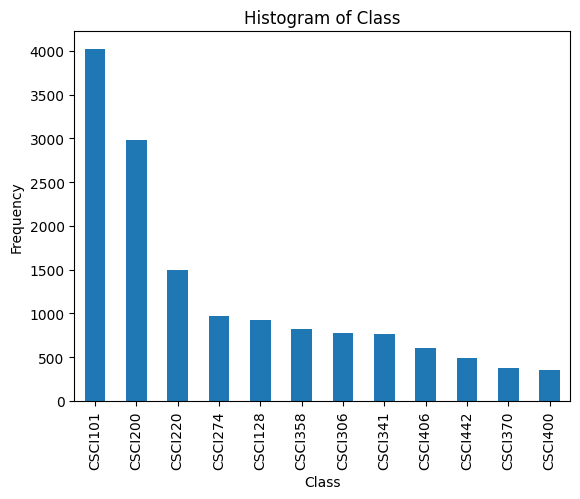

In [120]:
# plot histogram of different Classes 
melted_df['Class'].value_counts().plot(kind='bar')
plt.title('Histogram of Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

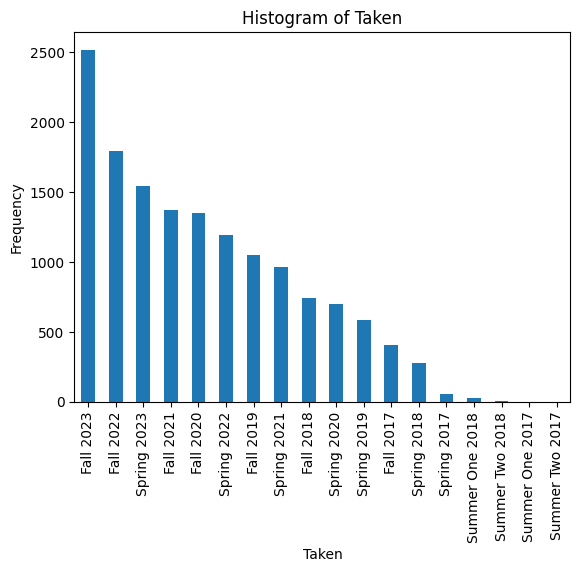

In [121]:
# plot histogram of different Semesters
melted_df['Taken'].value_counts().plot(kind='bar')
plt.title('Histogram of Taken')
plt.xlabel('Taken')
plt.ylabel('Frequency')
plt.show()

# Logit Manipulation

In [122]:
# remove duplicates from melted_df
melted_df = melted_df.drop_duplicates(subset=['id', 'Class', 'Taken', 'Type'])

In [123]:
unique_ids = melted_df['id'].unique()
unique_sems = melted_df['Taken'].unique()
unique_classes = melted_df['Class'].unique()

print(unique_ids)
print(1 in unique_ids)

[ 134  135  137 ... 6862 7081 7157]
False


In [124]:
id_list = []
for id in unique_ids:
    for i in range(len(unique_classes) * len(unique_sems)):
        id_list.append(id)

class_list = []
for id in unique_ids: 
    for cl in unique_classes:
        for i in range(len(unique_sems)):
            class_list.append(cl)

sem_list = []
for i in range(len(unique_ids) * len(unique_classes)):
    for sem in unique_sems:
        sem_list.append(sem)

In [125]:
print(len(id_list), len(class_list), len(sem_list))

1282392 1282392 1282392


In [126]:
log_df = pd.DataFrame({'id': id_list, 'Class': class_list, 'Taken': sem_list})
log_df

,id,Class,Taken
0,134,CSCI101,Fall 2017
1,134,CSCI101,Spring 2018
2,134,CSCI101,Spring 2019
3,134,CSCI101,Fall 2019
4,134,CSCI101,Spring 2017
...,...,...,...
1282387,7157,CSCI442,Summer One 2018
1282388,7157,CSCI442,Fall 2023
1282389,7157,CSCI442,Summer One 2017
1282390,7157,CSCI442,Summer Two 2018


In [129]:
# match on id
melted_df['unique_id'] = melted_df['id'].astype(str) + '_' + melted_df['Taken'].astype(str) + '_' + melted_df['Class'].astype(str)
log_df['unique_id'] = log_df['id'].astype(str) + '_' + log_df['Taken'].astype(str) + '_' + log_df['Class'].astype(str)
log_df['boolean'] = log_df['unique_id'].isin(melted_df['unique_id'])

In [130]:
# drop duplicate unique_id rows in melted_df
melted_df = melted_df.drop_duplicates(subset=['unique_id'])

In [131]:
print(len(log_df[log_df['boolean'].astype(str) == 'True'])) 
print(len(melted_df))

for tag in ['Class', 'Taken', 'unique_id']:
    log_classes = log_df[tag].unique().sort()
    melted_classes = melted_df[tag].unique().sort()
    print(f"Same {tag}?", log_classes == melted_classes)

14581
14581
Same Class? True
Same Taken? True
Same unique_id? True


In [132]:
print(len(log_df['Class'].unique()) * len(log_df['Taken'].unique()) * len(log_df['id'].unique()))
print(len(melted_df['id'].unique()) * len(melted_df['Taken'].unique()) * len(melted_df['Class'].unique()))

1282392
1282392


In [133]:
# save logit dataframe to .csv
log_df.to_csv('../data/CS_Course_Enrollment_Data_Log.csv', index=False)